In [1]:
from importlib import reload
import os
from time import time

import sys
sys.path.append('/homefs/home/wongfanc/CbAS/src')

import numpy as np
import scipy as sc
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [2]:
import run_gfp_tests
import util
import gfp_gp

Instructions for updating:
non-resource variables are not supported in the long term


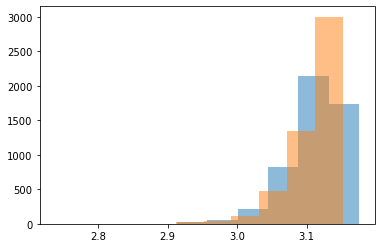

In [5]:
plt.hist(y_train, alpha=0.5);
plt.hist(gt_train, alpha=0.5);

In [6]:
reload(run_gfp_tests)
reload(util)

X_train, y_train, gt_train = util.get_experimental_X_y(random_state=0, train_size=5000)
vae_0 = util.build_vae(latent_dim=20,
          n_tokens=20, 
          seq_length=X_train.shape[1],
          enc1_units=50)
vae_0.fit([X_train], [X_train, np.zeros(X_train.shape[0])],
          epochs=10,
          batch_size=10,
          verbose=2)

ERROR! Session/line number was not unique in database. History logging moved to new session 276
Train on 5000 samples
Epoch 1/10
5000/5000 - 10s - loss: 52.3194 - decoder_loss: 39.8452 - kl_reshape_loss: 12.4742
Epoch 2/10
5000/5000 - 12s - loss: 29.0590 - decoder_loss: 24.3467 - kl_reshape_loss: 4.7124
Epoch 3/10
5000/5000 - 18s - loss: 26.5649 - decoder_loss: 23.3883 - kl_reshape_loss: 3.1767
Epoch 4/10
5000/5000 - 12s - loss: 24.9011 - decoder_loss: 22.7659 - kl_reshape_loss: 2.1352
Epoch 5/10
5000/5000 - 13s - loss: 23.4321 - decoder_loss: 22.3810 - kl_reshape_loss: 1.0511
Epoch 6/10
5000/5000 - 13s - loss: 22.6442 - decoder_loss: 22.1666 - kl_reshape_loss: 0.4777
Epoch 7/10
5000/5000 - 18s - loss: 22.0709 - decoder_loss: 21.9791 - kl_reshape_loss: 0.0919
Epoch 8/10
5000/5000 - 19s - loss: 22.0057 - decoder_loss: 21.9276 - kl_reshape_loss: 0.0781
Epoch 9/10
5000/5000 - 17s - loss: 21.9416 - decoder_loss: 21.8401 - kl_reshape_loss: 0.1015
Epoch 10/10
5000/5000 - 18s - loss: 21.9128 

In [ ]:
y_model = gfp_gp.SequenceGP(load=True, load_prefix='/homefs/home/wongfanc/CbAS/data/gfp_gp')

In [19]:
samples = 500
zt = np.random.randn(samples, 20)
Xt_p = vae_0.decoder_.predict(zt)
Xt = util.get_samples(Xt_p)
Xt_aa = np.argmax(Xt, axis=-1)
ygen_n = y_model.predict(Xt_aa, print_every=10000)

Number of Kstar elements filled: 10000 / 500000
Number of Kstar elements filled: 20000 / 500000
Number of Kstar elements filled: 30000 / 500000
Number of Kstar elements filled: 40000 / 500000
Number of Kstar elements filled: 50000 / 500000
Number of Kstar elements filled: 60000 / 500000
Number of Kstar elements filled: 70000 / 500000
Number of Kstar elements filled: 80000 / 500000
Number of Kstar elements filled: 90000 / 500000
Number of Kstar elements filled: 100000 / 500000
Number of Kstar elements filled: 110000 / 500000
Number of Kstar elements filled: 120000 / 500000
Number of Kstar elements filled: 130000 / 500000
Number of Kstar elements filled: 140000 / 500000
Number of Kstar elements filled: 150000 / 500000
Number of Kstar elements filled: 160000 / 500000
Number of Kstar elements filled: 170000 / 500000
Number of Kstar elements filled: 180000 / 500000
Number of Kstar elements filled: 190000 / 500000
Number of Kstar elements filled: 200000 / 500000
Number of Kstar elements fill

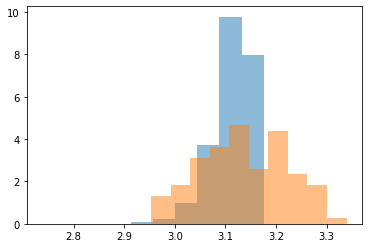

In [17]:
plt.hist(y_train, alpha=0.5, density=True);
plt.hist(ygen_n, alpha=0.5, density=True);

In [23]:
idx = np.where(ygen_n >= np.quantile(ygen_n, 0.5))[0]
X_train2 = Xt[idx]
weights = np.ones(X_train2.shape[0])
print(X_train2.shape)

vae_0.fit([X_train2], [X_train2, np.zeros(X_train2.shape[0])],
    epochs=10,
    batch_size=10,
    shuffle=False,
    sample_weight=[weights, weights],
    verbose=2)

(250, 237, 20)
Train on 250 samples
Epoch 1/10
250/250 - 0s - loss: 15.2244 - decoder_loss: 15.0584 - kl_reshape_loss: 0.1659
Epoch 2/10
250/250 - 0s - loss: 15.0523 - decoder_loss: 14.8624 - kl_reshape_loss: 0.1899
Epoch 3/10
250/250 - 1s - loss: 15.1140 - decoder_loss: 14.9085 - kl_reshape_loss: 0.2055
Epoch 4/10
250/250 - 0s - loss: 15.0710 - decoder_loss: 14.8503 - kl_reshape_loss: 0.2207
Epoch 5/10
250/250 - 0s - loss: 15.0135 - decoder_loss: 14.7623 - kl_reshape_loss: 0.2512
Epoch 6/10
250/250 - 1s - loss: 15.0166 - decoder_loss: 14.7691 - kl_reshape_loss: 0.2476
Epoch 7/10
250/250 - 1s - loss: 14.9998 - decoder_loss: 14.7160 - kl_reshape_loss: 0.2838
Epoch 8/10
250/250 - 0s - loss: 14.9188 - decoder_loss: 14.6192 - kl_reshape_loss: 0.2996
Epoch 9/10
250/250 - 1s - loss: 15.0782 - decoder_loss: 14.7608 - kl_reshape_loss: 0.3174
Epoch 10/10
250/250 - 1s - loss: 14.8230 - decoder_loss: 14.5007 - kl_reshape_loss: 0.3223


In [28]:
samples = 500
zt = np.random.randn(samples, 20)
Xt_p2 = vae_0.decoder_.predict(zt)
Xt2 = util.get_samples(Xt_p2)
Xt_aa2 = np.argmax(Xt2, axis=-1)
ygen_n2 = y_model.predict(Xt_aa2, print_every=100000)

Number of Kstar elements filled: 100000 / 500000
Number of Kstar elements filled: 200000 / 500000
Number of Kstar elements filled: 300000 / 500000
Number of Kstar elements filled: 400000 / 500000
Number of Kstar elements filled: 500000 / 500000


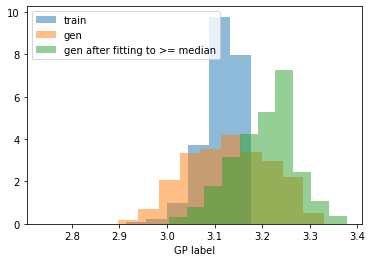

In [31]:
plt.hist(y_train, alpha=0.5, density=True, label='train');
plt.hist(ygen_n, alpha=0.5, density=True, label='gen');
plt.hist(ygen_n2, alpha=0.5, density=True, label='gen after fitting to >= median');
plt.xlabel('GP label');
plt.legend();